In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

In [43]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/zhengy9/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
def clean_text(text):
    # convert text to lowercase
    text = text.lower()
    # remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # tokenize text into individual words
    words = word_tokenize(text)
    # remove stop words
    words = [w for w in words if w not in stopwords.words('english')]
    # lemmatize words
    lem = WordNetLemmatizer()
    words = [lem.lemmatize(w) for w in words]
    # recombine words into a single string
    text = ' '.join(words)
    return text

In [45]:
sample_amount = 5000

In [46]:
train = pd.read_csv('/home/zhengy9/MachineLearning/Project/train.csv')
train.head(3)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0


In [47]:
test = pd.read_csv('/home/zhengy9/MachineLearning/Project/test.csv')
test.head(3)

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...


In [48]:
sample = train.sample(n=2000, random_state=42)
sample = sample[['question_text', 'target']].dropna()
sample['question_text'] = sample['question_text'].apply(lambda x: x.lower().strip())

cleaned = [clean_text(text) for text in sample['question_text']]
# select features and target

sample.head(3)

,question_text,target
443046,what is the most effective classroom managemen...,0
947549,can i study abroad after 10th class from bangl...,0
523769,how can i make friends as a college junior?,0


In [49]:
X = cleaned
y = sample.target
y = y.astype('category')

In [50]:
# define parameter grid for grid search cross-validation
grid = {'alpha':np.linspace(0,500,501)}
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf = vectorizer.fit_transform(X)
# no target y. Latent Semantic Analysis is unsupervised.
vocabulary = pd.Series(vectorizer.get_feature_names_out())

In [51]:
grid = {'alpha':np.linspace(0,1,101)}
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,
                        param_grid=grid,
                        return_train_score=True,
                        n_jobs=-1)
NBayesCV.fit(tfidf,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:629: FutureWarning: 

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])},
             return_train_score=True)

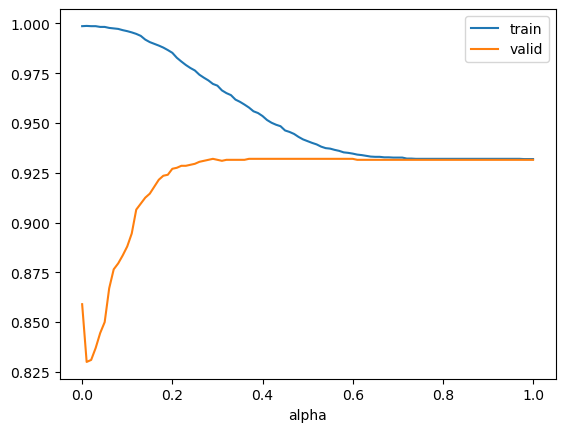

In [52]:
results = pd.DataFrame()
results['alpha'] = grid['alpha']
results['train'] = NBayesCV.cv_results_['mean_train_score']
results['valid'] = NBayesCV.cv_results_['mean_test_score']
# results['baseline'] = 0.5
results.plot.line(x='alpha',y=['train','valid'])
plt.show()

In [53]:
a = NBayesCV.best_params_
word_counts = vectorizer.fit_transform(cleaned)
vocabulary = vectorizer.get_feature_names_out()
a

{'alpha': 0.29}

In [79]:
acc_nbayes = NBayesCV.best_score_
print('Naive Bayes validation rate:',acc_nbayes.round(3))

Naive Bayes validation rate: 0.932


#Top 10 important insincere words

In [63]:

sample = train.sample(n=sample_amount, random_state=42)
sample = sample[['question_text', 'target']].dropna()
sample['question_text'] = sample['question_text'].apply(lambda x: x.lower().strip())
sample = sample[sample['target'] == 1]
cleaned = [clean_text(text) for text in sample['question_text']]
X = cleaned
y = sample.target
y = y.astype('category')

In [64]:
word_counts = vectorizer.fit_transform(cleaned)
vocabulary = vectorizer.get_feature_names_out()

In [65]:
word_counts = pd.DataFrame.sparse.from_spmatrix(word_counts,columns=vocabulary)

In [66]:
# count words
print('top ten words:')
word_counts.sum().sort_values(ascending=False).head(50)

top ten words:


best          54.052829
like          45.912064
people        43.048239
good          39.120580
year          32.087856
make          31.257740
time          30.135571
india         28.377810
job           28.057136
way           26.694684
think         25.954293
work          25.084409
know          23.974159
life          21.679124
day           21.132024
use           20.941509
used          20.712479
want          20.523492
feel          19.957445
friend        19.765328
difference    19.276400
person        19.257063
book          19.213514
thing         18.885081
college       18.541754
dont          18.310031
whats         17.953020
country       17.876116
new           17.410391
company       16.963348
girl          16.634471
business      16.548467
money         16.502964
mean          16.368087
stop          16.285748
change        16.273566
old           16.047835
world         15.981977
learn         15.900189
student       15.481100
indian        15.425860
university    15

In [59]:


Vectorizer = TfidfVectorizer(analyzer='word',stop_words='english')
tfidf      = Vectorizer.fit_transform(cleaned)
vocabulary = Vectorizer.get_feature_names_out()

In [60]:
tfidf = pd.DataFrame.sparse.from_spmatrix(tfidf,columns=vocabulary)
print(tfidf.shape)
tfidf.head()

(310, 1497)


,abbott,abiding,able,abled,abolished,abort,abortion,abroad,absolutely,abuse,...,xi,yahoo,year,yezidi,yiannopoulos,young,youth,zero,zionism,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.620887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# count words
print('top ten important insincere words:')
tfidf.sum().sort_values(ascending=False).head(20)

top ten important insincere words:


people      8.847891
woman       8.279694
indian      7.816885
like        6.902978
trump       5.707775
men         5.553395
black       4.493827
sex         4.412404
muslim      4.229911
dont        4.193482
quora       3.909173
feel        3.886991
question    3.820904
india       3.556466
american    3.301386
country     3.274101
white       3.271596
right       2.976939
liberal     2.840843
south       2.638522
dtype: float64

In [62]:
idf_words = pd.Series(Vectorizer.idf_,index=vocabulary).sort_values(ascending=False)
print('top ten idf words')
print('-----------------')
print(idf_words.head(40))

top ten idf words
-----------------
abbott                6.046646
notice                6.046646
nye                   6.046646
nut                   6.046646
nun                   6.046646
numerous              6.046646
nuclear               6.046646
nowadays              6.046646
noticed               6.046646
nose                  6.046646
obligated             6.046646
northeastern          6.046646
normal                6.046646
nonwhites             6.046646
noncollegeeducated    6.046646
nonbritish            6.046646
nityananda            6.046646
niece                 6.046646
ob                    6.046646
obscure               6.046646
newtown               6.046646
official              6.046646
opium                 6.046646
opinion               6.046646
operation             6.046646
online                6.046646
older                 6.046646
okay                  6.046646
oh                    6.046646
offering              6.046646
obsessed              6.046646
off

Logistici regressor

In [67]:
sample = train.sample(n=sample_amount, random_state=42)
sample = sample[['question_text', 'target']].dropna()
sample['question_text'] = sample['question_text'].apply(lambda x: x.lower().strip())
cleaned = [clean_text(text) for text in sample['question_text']]
X = cleaned
y = sample.target
y = y.astype('category')

In [94]:
#logistic regressor

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
tfidf = vectorizer.fit_transform(X)
logreg = LogisticRegression()
logreg.fit(tfidf, y)
vocabulary = vectorizer.vocabulary_


In [78]:
training_score = logreg.score(tfidf, y)
print('training score',training_score)

training score 0.9388


In [70]:
scores=cross_validate(logreg,tfidf, y, return_train_score=True, n_jobs=-1)
validation_score=scores["test_score"].mean()
print('validation score', validation_score)

validation score 0.9383999999999999


In [71]:
test = pd.read_csv('/home/zhengy9/MachineLearning/Project/test.csv')

In [72]:
print(logreg.coef_.shape)


(1, 8911)


In [97]:
ans = sample.copy()

vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',vocabulary=vocabulary)
tfidf = vectorizer.fit_transform(ans.question_text)
res = logreg.predict(tfidf) 

In [74]:
ans['target'] = res

In [81]:
ans.head(10)

,question_text,target
443046,what is the most effective classroom managemen...,0
947549,can i study abroad after 10th class from bangl...,0
523769,how can i make friends as a college junior?,0
949821,how do i download free apk minecraft: pocket e...,0
1030397,"like kuvera, is ""groww"" also a free online inv...",0
1277337,what is the precise definition for record in a...,0
199566,what was leonidas's role in the battle of ther...,0
1213793,how can we get universities in germany with ou...,0
105499,what's the remainder of 30^33/3?,0
552145,what is your mindset while learning a new skil...,0


In [82]:
insincere_df = ans[ans['target'] == 1]

In [35]:
sincere_df = ans[ans['target'] == 0]
sincere_df.head(100)

,question_text,target
443046,what is the most effective classroom managemen...,0
947549,can i study abroad after 10th class from bangl...,0
523769,how can i make friends as a college junior?,0
949821,how do i download free apk minecraft: pocket e...,0
1030397,"like kuvera, is ""groww"" also a free online inv...",0
...,...,...
1281435,what are some gang identifications? how do the...,0
30882,could the numerous acts of arms being severed ...,0
311740,does eating millets reduce insulin resistance?,0
794513,what are the best and worst years of high school?,0


In [36]:
 try:
    print()
    display(ans.head(3))
    df_ans.to_csv('/home/zhengy9/MachineLearning/Project/question_pred.csv',index=False)
    print('question_pred.csv saved.')
except:
    print('Error --> question_pred.csv has not been defined.')

,question_text,target
443046,what is the most effective classroom managemen...,0
947549,can i study abroad after 10th class from bangl...,0
523769,how can i make friends as a college junior?,0


Error --> question_pred.csv has not been defined.
